In [20]:
import pandas as pd
import seaborn as sns


In [21]:
train=pd.read_csv("/content/SalaryData_Train.csv")
test=pd.read_csv("/content/SalaryData_Test.csv")

In [22]:
train.shape

(30161, 14)

In [23]:
test.shape

(15060, 14)

In [24]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [25]:
train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [26]:
train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [27]:
train["workclass"].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [28]:
train["maritalstatus"].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [29]:
train["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [31]:
x_columns=[train.columns[:-1]]
x_columns[0]

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [32]:
str_Column=[ 'workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']

In [33]:
train.astype("object")

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [35]:
def test_eda(train):
  new_column=pd.DataFrame()
  new_column["concat"]=train[str_Column].apply(" ".join, axis=1)
  new_column["Salary"]=train["Salary"]
  new_column["concat"]=new_column.concat.apply(clean)
  new_column['concat'] = new_column['concat'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  vectorizer=CountVectorizer(analyzer=split_into_words)
  all_features=vectorizer.fit_transform(new_column["concat"])
  all_features["Salary"]=train["Salary"]
  return all_features

In [36]:
new_column=pd.DataFrame()

In [37]:
new_column["concat"]=train[str_Column].apply(" ".join, axis=1)

In [38]:
new_column["Salary"]=train["Salary"]
new_column

,concat,Salary
0,State-gov Bachelors Never-married Adm-cler...,<=50K
1,Self-emp-not-inc Bachelors Married-civ-spou...,<=50K
2,Private HS-grad Divorced Handlers-cleaners...,<=50K
3,Private 11th Married-civ-spouse Handlers-c...,<=50K
4,Private Bachelors Married-civ-spouse Prof-...,<=50K
...,...,...
30156,Private Assoc-acdm Married-civ-spouse Tech...,<=50K
30157,Private HS-grad Married-civ-spouse Machine...,>50K
30158,Private HS-grad Widowed Adm-clerical Unma...,<=50K
30159,Private HS-grad Never-married Adm-clerical...,<=50K


In [39]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [40]:
new_column["concat"]=new_column.concat.apply(clean)

In [41]:
new_column

,concat,Salary
0,stategov bachelors nevermarried admclerica...,<=50K
1,selfempnotinc bachelors marriedcivspouse e...,<=50K
2,private hsgrad divorced handlerscleaners ...,<=50K
3,private marriedcivspouse handlerscleaners...,<=50K
4,private bachelors marriedcivspouse profspe...,<=50K
...,...,...
30156,private assocacdm marriedcivspouse techsup...,<=50K
30157,private hsgrad marriedcivspouse machineopi...,>50K
30158,private hsgrad widowed admclerical unmarr...,<=50K
30159,private hsgrad nevermarried admclerical o...,<=50K


In [42]:
#Word frequency
freq = pd.Series(' '.join(new_column['concat']).split()).value_counts()[:20] # for top 20
freq

unitedstates        27504
white               25932
private             22285
male                20380
marriedcivspouse    14065
husband             12463
hsgrad               9840
female               9781
nevermarried         9725
notinfamily          7726
somecollege          6677
bachelors            5044
ownchild             4466
divorced             4214
profspecialty        4038
craftrepair          4030
execmanagerial       3992
admclerical          3721
sales                3584
unmarried            3212
dtype: int64

In [43]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_column['concat'] = new_column['concat'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(new_column['concat']).split()).value_counts()[:20] # for top 20
freq_Sw

unitedstates        27504
white               25932
private             22285
male                20380
marriedcivspouse    14065
husband             12463
hsgrad               9840
female               9781
nevermarried         9725
notinfamily          7726
somecollege          6677
bachelors            5044
ownchild             4466
divorced             4214
profspecialty        4038
craftrepair          4030
execmanagerial       3992
admclerical          3721
sales                3584
unmarried            3212
dtype: int64

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 1000)
X = vectorizer.fit_transform(new_column['concat'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
word_freq_df.value_counts()

term                   occurrences  frequency
amerindianeskimo       286          0.024872     1
armedforces            9            0.000783     1
marriedafspouse        21           0.001826     1
marriedspouseabsent    370          0.032177     1
mexico                 610          0.053048     1
nicaragua              33           0.002870     1
otherrelative          888          0.077224     1
outlyingusguamusvietc  14           0.001217     1
peru                   30           0.002609     1
philippines            188          0.016349     1
poland                 56           0.004870     1
portugal               34           0.002957     1
preschool              45           0.003913     1
privhouseserv          143          0.012436     1
profschool             542          0.047135     1
protectiveserv         644          0.056005     1
puertorico             109          0.009479     1
scotland               11           0.000957     1
separated              939          

In [47]:
word_freq_df.head(30)

,term,occurrences,frequency
0,amerindianeskimo,286,0.024872
1,armedforces,9,0.000783
2,asianpacislander,895,0.077833
3,cambodia,18,0.001565
4,canada,107,0.009305
5,china,68,0.005914
6,columbia,56,0.004870
7,cuba,92,0.008001
8,doctorate,375,0.032612
9,dominicanrepublic,67,0.005827


In [48]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(new_column["concat"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
df

,admclerical,amerindianeskimo,armedforces,asianpacislander,assocacdm,assocvoc,bachelors,black,cambodia,canada,...,techsupport,thailand,transportmoving,trinadadtobago,unmarried,vietnam,widowed,wife,withoutpay,yugoslavia
0,0.462197,0.0,0.0,0.0,0.000000,0.0,0.416739,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.466353,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.570758,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.281158,0.339883,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.409923,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.000000,0.0,0.0,0.0,0.550908,0.0,0.000000,0.000000,0.0,0.0,...,0.563433,0.0,0.0,0.0,0.00000,0.0,0.000000,0.509254,0.0,0.0
30157,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
30158,0.436502,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.45726,0.0,0.648661,0.000000,0.0,0.0
30159,0.594361,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0


In [50]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [51]:
top2_words = get_top_n2_words(new_column["concat"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,male unitedstates,18572
1,white male,18038
2,husband white,11323
3,female unitedstates,8932
4,white female,7894
5,private hsgrad,7678
6,notinfamily white,6676
7,private somecollege,5015
8,hsgrad marriedcivspouse,4571
9,ownchild white,3765


[Text(0, 0, 'male unitedstates'),
 Text(0, 0, 'white male'),
 Text(0, 0, 'husband white'),
 Text(0, 0, 'female unitedstates'),
 Text(0, 0, 'white female'),
 Text(0, 0, 'private hsgrad'),
 Text(0, 0, 'notinfamily white'),
 Text(0, 0, 'private somecollege'),
 Text(0, 0, 'hsgrad marriedcivspouse'),
 Text(0, 0, 'ownchild white'),
 Text(0, 0, 'private bachelors'),
 Text(0, 0, 'hsgrad nevermarried'),
 Text(0, 0, 'somecollege marriedcivspouse'),
 Text(0, 0, 'bachelors marriedcivspouse'),
 Text(0, 0, 'somecollege nevermarried'),
 Text(0, 0, 'marriedcivspouse craftrepair'),
 Text(0, 0, 'craftrepair husband'),
 Text(0, 0, 'marriedcivspouse execmanagerial'),
 Text(0, 0, 'unmarried white'),
 Text(0, 0, 'execmanagerial husband')]

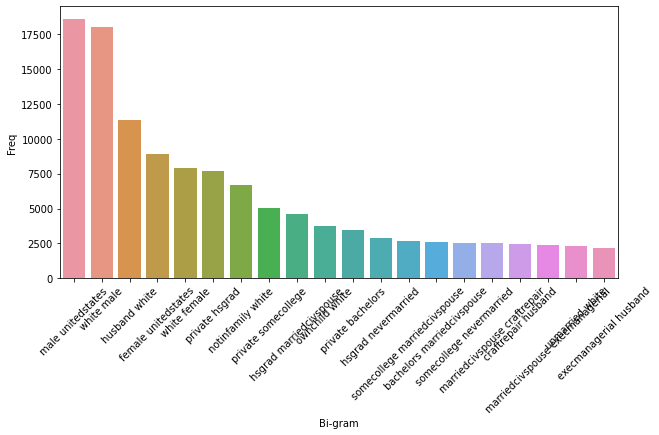

In [52]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [53]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [54]:
top3_words = get_top_n3_words(new_column["concat"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

[Text(0, 0, 'white male unitedstates'),
 Text(0, 0, 'husband white male'),
 Text(0, 0, 'white female unitedstates'),
 Text(0, 0, 'notinfamily white male'),
 Text(0, 0, 'private hsgrad marriedcivspouse'),
 Text(0, 0, 'notinfamily white female'),
 Text(0, 0, 'private hsgrad nevermarried'),
 Text(0, 0, 'marriedcivspouse craftrepair husband'),
 Text(0, 0, 'craftrepair husband white'),
 Text(0, 0, 'marriedcivspouse execmanagerial husband'),
 Text(0, 0, 'ownchild white male'),
 Text(0, 0, 'private somecollege nevermarried'),
 Text(0, 0, 'execmanagerial husband white'),
 Text(0, 0, 'private somecollege marriedcivspouse'),
 Text(0, 0, 'marriedcivspouse profspecialty husband'),
 Text(0, 0, 'unmarried white female'),
 Text(0, 0, 'private bachelors marriedcivspouse'),
 Text(0, 0, 'ownchild white female'),
 Text(0, 0, 'profspecialty husband white'),
 Text(0, 0, 'marriedcivspouse sales husband')]

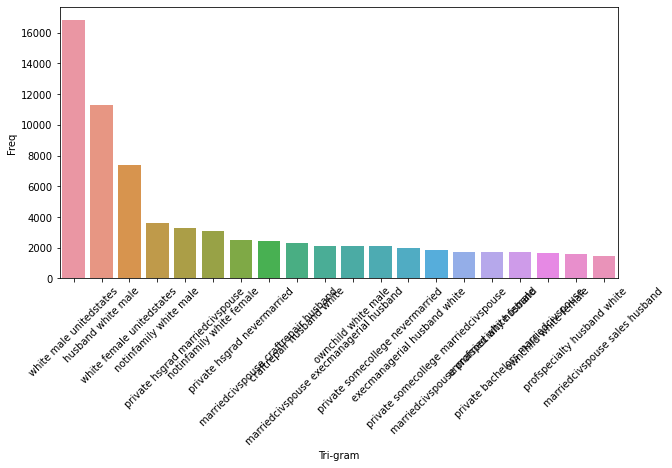

In [55]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

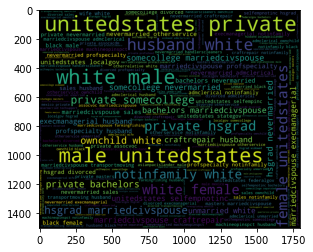

In [56]:
string_Total = " ".join(new_column["concat"])
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [57]:
def split_into_words(i):
    return (i.split(" "))

In [58]:
vectorizer=CountVectorizer(analyzer=split_into_words)
all_features=vectorizer.fit_transform(new_column["concat"])

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(all_features,train["Salary"],test_size=0.3,random_state=88)

In [60]:
vectorizer.vocabulary_

{'admclerical': 0,
 'amerindianeskimo': 1,
 'armedforces': 2,
 'asianpacislander': 3,
 'assocacdm': 4,
 'assocvoc': 5,
 'bachelors': 6,
 'black': 7,
 'cambodia': 8,
 'canada': 9,
 'china': 10,
 'columbia': 11,
 'craftrepair': 12,
 'cuba': 13,
 'divorced': 14,
 'doctorate': 15,
 'dominicanrepublic': 16,
 'ecuador': 17,
 'elsalvador': 18,
 'england': 19,
 'execmanagerial': 20,
 'farmingfishing': 21,
 'federalgov': 22,
 'female': 23,
 'france': 24,
 'germany': 25,
 'greece': 26,
 'guatemala': 27,
 'haiti': 28,
 'handlerscleaners': 29,
 'honduras': 30,
 'hong': 31,
 'hsgrad': 32,
 'hungary': 33,
 'husband': 34,
 'india': 35,
 'iran': 36,
 'ireland': 37,
 'italy': 38,
 'jamaica': 39,
 'japan': 40,
 'laos': 41,
 'localgov': 42,
 'machineopinspct': 43,
 'male': 44,
 'marriedafspouse': 45,
 'marriedcivspouse': 46,
 'marriedspouseabsent': 47,
 'masters': 48,
 'mexico': 49,
 'nevermarried': 50,
 'nicaragua': 51,
 'notinfamily': 52,
 'otherrelative': 53,
 'otherservice': 54,
 'outlyingusguamusvie

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
classifier=MultinomialNB()

In [63]:
classifier.fit(x_train,y_train)

MultinomialNB()

In [64]:
classifier.score(x_test,y_test)

0.7685932147198585

In [65]:
x_test

<9049x89 sparse matrix of type '<class 'numpy.int64'>'
	with 71195 stored elements in Compressed Sparse Row format>

In [66]:
y_test

16231      >50K
23745      >50K
458       <=50K
9056       >50K
9947      <=50K
          ...  
22438     <=50K
20340     <=50K
9607      <=50K
9221      <=50K
8409      <=50K
Name: Salary, Length: 9049, dtype: object

In [67]:
def test_eda(train1):
  train=train1
  new_column=pd.DataFrame()
  new_column["concat"]=train[str_Column].apply(" ".join, axis=1)
  new_column["Salary"]=train["Salary"]
  new_column["concat"]=new_column.concat.apply(clean)
  new_column['concat'] = new_column['concat'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  return new_column

Test data EDA

In [69]:
test_data=test_eda(test.copy())
test_data

,concat,Salary
0,private nevermarried machineopinspct ownchild ...,<=50K
1,private hsgrad marriedcivspouse farmingfishing...,<=50K
2,localgov assocacdm marriedcivspouse protective...,>50K
3,private somecollege marriedcivspouse machineop...,>50K
4,private nevermarried otherservice notinfamily ...,<=50K
...,...,...
15055,private bachelors nevermarried profspecialty o...,<=50K
15056,private bachelors divorced profspecialty notin...,<=50K
15057,private bachelors marriedcivspouse profspecial...,<=50K
15058,private bachelors divorced admclerical ownchil...,<=50K


In [72]:
new_column["concat"]

0        stategov bachelors nevermarried admclerical no...
1        selfempnotinc bachelors marriedcivspouse execm...
2        private hsgrad divorced handlerscleaners notin...
3        private marriedcivspouse handlerscleaners husb...
4        private bachelors marriedcivspouse profspecial...
                               ...                        
30156    private assocacdm marriedcivspouse techsupport...
30157    private hsgrad marriedcivspouse machineopinspc...
30158    private hsgrad widowed admclerical unmarried w...
30159    private hsgrad nevermarried admclerical ownchi...
30160    selfempinc hsgrad marriedcivspouse execmanager...
Name: concat, Length: 30161, dtype: object

In [73]:
all_features=vectorizer.transform(test_data["concat"])

In [74]:
classifier.score(all_features,test_data["Salary"])

0.7740371845949535